## 1. Scalars & Vectors

   Scalar is a single number, denoted as $x$

   Vector is an array of scalars, denoted by $\boldsymbol{x}$

   Thus, a vector has $n$ scalars $x_1, x_2 \cdots x_n$
   
   A matrix is a 2-D array
   
   A tensor is a n-dimensional array with n>2


Note that indexing here begins with 1, unlike python (where it begins with 0)
$$
\boldsymbol{x} =\begin{bmatrix}
    x_1 \\
    x_2 \\
    \cdots \\
    x_n
\end{bmatrix}
$$

Let us now look how we can create an array using numpy

In [2]:
import numpy as np
x = np.array([4,5,6])
print(x)
print(x.shape)

[4 5 6]
(3,)


In [3]:
# to make it a column vector
x = np.array([[4],[5],[6]])
print(x)
print(x.shape)

[[4]
 [5]
 [6]]
(3, 1)


## 2. Matrices & Tensors

Matrix is a 2D array of scalars, denoted by $\boldsymbol{X}$$$
\boldsymbol{X}=
\begin{bmatrix}
  X_{1,1} &amp; X_{1,2} &amp; \cdots &amp; X_{1,n} \\\\
  X_{2,1} &amp; X_{2,2} &amp; \cdots &amp; X_{2,n} \\\\
  \cdots &amp; \cdots &amp; \cdots &amp; \cdots \\\\
  X_{m,1} &amp; X_{m,2} &amp; \cdots &amp; X_{m,n}
\end{bmatrix}
$$

This matrix has $m$ rows and $n$ columns

Each indvidual element such as $X_{1,1}$ is a scalar

If $m = n$, the matrix is known as Square Matrix

Tensor is an array with more than 2 axes, denoted as X, like an image.

Think of Tensor as a generalization of an array with more than 2 axes

In [5]:
X = np.array([[4,5,7,10], 
              [10, 11, 13,11], 
              [56, 80, 90,12]])
print(X)
print(X.shape)

[[ 4  5  7 10]
 [10 11 13 11]
 [56 80 90 12]]
(3, 4)


In [6]:
X=X.reshape((-1,1))
X

array([[ 4],
       [ 5],
       [ 7],
       [10],
       [10],
       [11],
       [13],
       [11],
       [56],
       [80],
       [90],
       [12]])

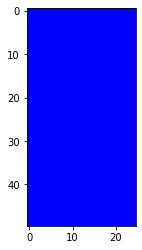

In [11]:
T = np.zeros((50,25,3),dtype='uint8') #i want to create an image that's why I am using unint8
T[ : , : ,2] = 255#select all rows,all columns,select only 2nd channel

import matplotlib.pyplot as plt

plt.imshow(T)#only see 2-d 
plt.show()

## 3. Transpose

 For a 2D matrix transpose can be obtained as follows $(A^T)_{i,j} = A_{j, i}$

 For a vector, transpose makes the column vector into a row. Thus a column

 vector can also be represented as $\boldsymbol{x} = [x_1, x_2, x_3]^T$

In [18]:
X

array([[ 4,  5,  7, 10],
       [10, 11, 13, 11],
       [56, 80, 90, 12]])

In [15]:
y = X.reshape((3,4)) #converting it back to matrix
y

array([[ 4,  5,  7, 10],
       [10, 11, 13, 11],
       [56, 80, 90, 12]])

In [16]:
print(y.T) #taking transpose

[[ 4 10 56]
 [ 5 11 80]
 [ 7 13 90]
 [10 11 12]]


In [19]:
X=X.reshape((-1,1))

In [20]:
X

array([[ 4],
       [ 5],
       [ 7],
       [10],
       [10],
       [11],
       [13],
       [11],
       [56],
       [80],
       [90],
       [12]])

In [24]:
y=X.T #becomes a row vector
y

array([[ 4,  5,  7, 10, 10, 11, 13, 11, 56, 80, 90, 12]])

In [26]:
y[0][0]

4

In [27]:
y[0][5]

11

In [28]:
# Transpose of Tensor
T.shape

#print(T[0][0])
print(T.shape)
T1 = np.transpose(T,axes=(2,0,1))
print(T1.shape)

print(T[0][0].shape)
print(T1[0][0].shape)

(50, 25, 3)
(3, 50, 25)
(3,)
(25,)


## 4. Broadcasting

You can add a scalar to a vector, and numpy will add it to each element in the vector

$\boldsymbol{x} + a = \boldsymbol{x}_i + a$

Similarly you can add a vector to a matrix, and numpy will add the vector to each column of the matrix

In [29]:
x = np.array([1,2,3,4]) #only a feature of numpy
print(x)
print(x+4) #adding scalar 

[1 2 3 4]
[5 6 7 8]


In [30]:
X = np.array([[10,20,30,40], #adding vector to matrix
             [40,50,60,70]]) 

print(X)
print(X + x)

[[10 20 30 40]
 [40 50 60 70]]
[[11 22 33 44]
 [41 52 63 74]]


## 5. Matrix Multiplication

This is perhaps one operation that you would use quite frequently in any ML/DL model. You should remember a few things about multiplication

$\boldsymbol{C} = \boldsymbol{A} \boldsymbol{B}$ is only defined when the second dimension of $\boldsymbol{A}$ matches the first dimension of $\boldsymbol{B}$
Further, if $\boldsymbol{A}$ is of shape (m, n) and $\boldsymbol{B}$ of shape (n, p), then $\boldsymbol{C}$ is of shape (m, p)

This operation is concretely defined as $C_{i,j} = \sum_k A_{i, k} B_{k, j}$

$\boldsymbol{C}_{i, j}$ is computed by taking the dot product of $i$-th row of $\boldsymbol{A}$ with $j$-th column of $\boldsymbol{B}$

A more useful method to think of matrix multiplcation is as linear combination of columns of $\boldsymbol{A}$ weighted by column entries of $\boldsymbol{B}$
Matrix Multiplication

time complexity - O(N^3)

In [31]:
A = np.array([[1,2],
              [3,4]])

B = np.array([[0,2],
              [3,2]])

C = np.dot(A,B)
print(C)

[[ 6  6]
 [12 14]]


## 6. Element Wise multiplication: Hadamard product

Element wise multiplication $\boldsymbol{A} \odot \boldsymbol{B}$

Notice how numpy uses the * for this. Important to be careful, and not to confuse this with matrix multiplication. Matrix of same shape is required.

In [32]:
A = np.array([[1,2],
              [3,4]])

B = np.array([[0,2],
              [3,2]])

A*B

array([[0, 4],
       [9, 8]])

## 7. Norms
Norm can be thought of as a proxy for size of a vector. Magnitude of vector.

We define $L^p$ norm $\Vert \boldsymbol{x}\Vert _p = (\sum |\boldsymbol{x}_i|^{p})^{\frac{1}{p}}$

$p \ge 1, p \in \Re$

Norm is a function that maps vectors to non-negative values. A norm satisfies the following properties:

f(x)=0 ==> x=0

$f(\boldsymbol{x} + \boldsymbol{y}) \le f(\boldsymbol{x}) + f(\boldsymbol{y})$ (Triangle inequality)

$\forall \ \alpha \in \Re, \ f(\alpha \ \boldsymbol{x}) = |\alpha|\ f(\boldsymbol{x})$

$L^2$ norm is called the Euclidean norm, often $\Vert \boldsymbol{x} \Vert$

We work mostly with squared $L^2$ norm which can be computed as $\boldsymbol{x}^T \boldsymbol{x}$

Squared $L^2$ norm is easier to work with as its derivative is $2 * \boldsymbol{x}$

In some ML applications it is important to distinguish between elements that are zero and small but zero. Squared $L^2$ norm may not be the right choice as it grows very slowly near the origin

$L^1$ norm is the absolute sum of all members of a vector

Useful when difference between 0 and non-zero elements is essential.
Max-Norm: $L^\infty$: This simplifies to absoute value of the element with highest magnitude

In [33]:
x = np.array([-3,4])

lp2 = np.linalg.norm(x) #by default it gives lp2
print(lp2)

lp1 = np.linalg.norm(x,ord=1) #gives absolute sum
print(lp1)

lpinf = np.linalg.norm(x,ord=np.inf) #infinity norm
print(lpinf)

5.0
7.0
4.0


## 8. Determinants

In [34]:
A = np.array([[1,2],
              [3,4]])


np.linalg.det(A)

-2.0000000000000004

## 9. Inverse

In [35]:
A = np.array([[1,2],
              [3,4]])
Ainv = np.linalg.inv(A)

print(Ainv)

[[-2.   1. ]
 [ 1.5 -0.5]]


In [39]:
np.dot(A,Ainv) #gives identity matrix

array([[1.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 1.00000000e+00]])

In [40]:
pinv = np.linalg.pinv(A)
print(pinv)  #computes pseudo-inverse in case determinant is 0

[[-2.   1. ]
 [ 1.5 -0.5]]


## 10. Solve a System of Equations

In [41]:
a = np.array([[2,3], [3,1]])
b = np.array([8,5])

In [42]:
np.linalg.solve(a,b)

array([1., 2.])